In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [5]:
x_test.shape

(10000, 28, 28)

In [4]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2941 - accuracy: 0.9130 - val_loss: 0.1450 - val_accuracy: 0.9570
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1402 - accuracy: 0.9579 - val_loss: 0.0986 - val_accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1033 - accuracy: 0.9689 - val_loss: 0.0887 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.0713 - val_accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0720 - accuracy: 0.9773 - val_loss: 0.0695 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0630 - accuracy: 0.9802 - val_loss: 0.0707 - val_accuracy: 0.9787
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0571 - accuracy: 0.9813 - val_loss: 0.0714 - val_accuracy:

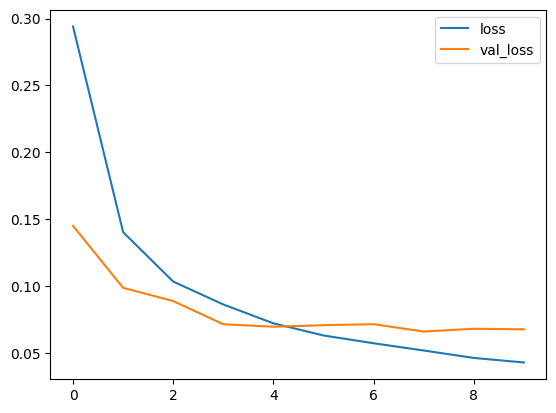

In [29]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

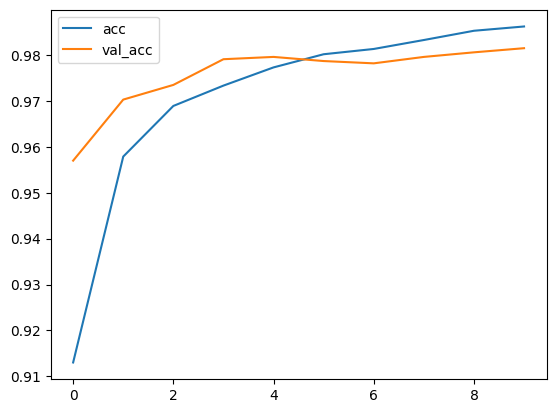

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [33]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0675 - accuracy: 0.9815
[0.06753765046596527, 0.9815000295639038]


313/313 [==============================] - 0s 1ms/step
Confusion matrix, without normalization
[[ 970    0    1    1    0    0    2    1    5    0]
 [   0 1123    2    2    0    1    2    0    5    0]
 [   2    1 1011    4    3    0    1    3    7    0]
 [   0    0    2  995    0    5    0    3    1    4]
 [   1    0    1    0  970    0    5    0    1    4]
 [   2    0    0    7    1  873    2    2    4    1]
 [   2    2    0    1    4    7  941    0    1    0]
 [   3    4   13    5    3    0    0  993    2    5]
 [   2    0    3    4    3    3    0    2  953    4]
 [   1    2    0    4    9    3    0    3    1  986]]


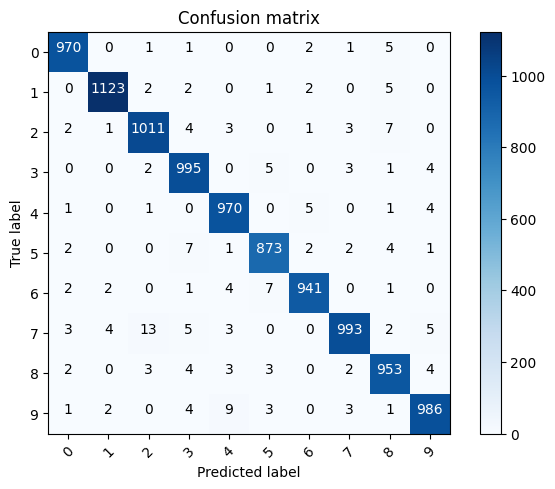

In [34]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

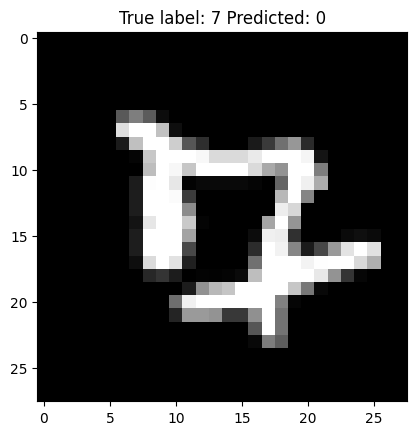

In [54]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));